# Lab 5

In [1]:
import random
import numpy as np
import operator
import matplotlib.pyplot as plt

import matplotlib.animation as anim
from IPython.display import HTML, display
plt.rcParams["animation.html"] = "jshtml"

# Optional: add this code after `anim_fig = anim.FuncAnimation(...)`
#           to eliminate the extra final frame
# display(HTML(anim_fig.to_jshtml()))
# plt.close() 

### Insertion Sort
Write a function **`insertion_sort(nums)`** that takes a list of numbers and uses the **insertion sort algorithm** to sort the numbers in place, modifying the `nums` argument. The function does not return a value.

For example,
```
ints = [11, 13, 8, 7, 10]
insertion_sort(ints)
ints
```
displays
```
[7, 8, 10, 11, 13]
```

In [2]:
# def insertion_sort2(nums):
#     for i in range(1,len(nums)):
#         while nums[i] < nums[i-1] and i>0:
#             temp = nums[i]
#             nums[i] = nums[i-1]
#             nums[i-1] = temp
#             i = i-1

In [56]:
def insertion_sort(nums):
    for j in range(1, len(nums)):
        key = nums[j]
        i = j-1
        while i>=0 and nums[i]>key:
            nums[i+1] = nums[i]
            i -= 1
        nums[i+1] = key

In [57]:
# def insertion_sort2(nums):
#     for j in range(1, len(nums)):
#         key = nums[j]
#         i = j-1
#         while i>=0 and nums[i]>key:
#             nums[i+1] = nums[i]
#             nums[i] = key
#             i -= 1

In [58]:
ints = [-5, 100, 0, 0, 24, 11, 13, 8, 7, 10]
insertion_sort(ints)
ints

[-5, 0, 0, 7, 8, 10, 11, 13, 24, 100]

### Bar Chart with Labels
Here is a sample bar chart with labels.

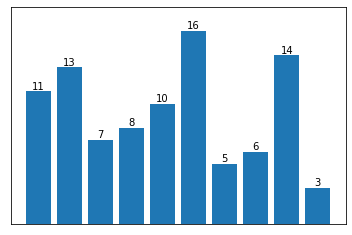

In [59]:
nums = [11, 13, 7, 8, 10, 16, 5, 6, 14, 3]

fig, ax = plt.subplots()
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylim(0, 2+max(nums))

bars = ax.bar(range(len(nums)), nums)  
ax.bar_label(bars)
plt.show()

### Insertion Sort Visualization
**Create a visualization of the insertion sort algorithm** using vertical bars to represent the numbers. The sorted numbers on the left should have a different color from the unsorted numbers on the right. The current `key` should be highlighted in a third color. Your code should be able to handle at least 10 numbers in the range 1 to 20. 

*Hint:* Write a variation of `insertion_sort` that saves all of the intermediate results. Then when you run the animation, each frame will display one iteration of the algorithm. To make a copy of `nums`, you can write `nums.copy()`.

Example: A visualization of insertion sort for the list 

`[11, 13, 7, 8, 10, 16, 5, 6, 14, 3]` 

can be found at http://www.coloradomath.org/python/insertion_sort.gif.

<img src = "http://www.coloradomath.org/python/insertion_sort_pic.jpg" width="691" height="461" />


In [60]:
def insertion_sort_anim(nums):
    big_lst = []
    for j in range(1, len(nums)):
        key = nums[j]
        i = j-1
        copy = nums.copy()
        big_lst.append((copy, j, j))
        while i>=0 and nums[i]>key:
            nums[i+1] = nums[i]
            nums[i] = key
            copy = nums.copy()
            big_lst.append((copy, i, j))
            i -= 1
    
    fig, ax = plt.subplots()
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, 2+max(nums))
    def draw(fval):
        ax.clear()
        lst = big_lst[fval][0]
        i = big_lst[fval][1]
        j = big_lst[fval][2]
        key = lst[i]
        left_blue_bars = ax.bar(range(i), lst[:i], color='b')  
        key_bar = ax.bar(i, key, color='cyan') 
        right_blue_bars = ax.bar(range(i+1,j+1), lst[i+1:j+1], color='b')  
        right_bars = ax.bar(range(j+1, len(lst)), lst[j+1:], color='gray') 
        ax.bar_label(left_blue_bars)
        ax.bar_label(key_bar)
        ax.bar_label(right_blue_bars)
        ax.bar_label(right_bars)
        plt.show()
    
        
    return anim.FuncAnimation(fig, draw, 
                                   frames=len(big_lst), 
                                   interval=200)

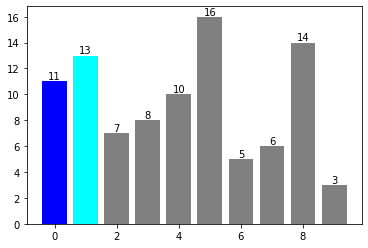

In [61]:
insertion_sort_anim([11, 13, 7, 8, 10, 16, 5, 6, 14, 3])